#### Загрузка библиотек

In [636]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
%matplotlib inline

#### Загрузка датасетов

In [637]:
df = pd.read_csv('/Users/User/Desktop/pandas/course_project/train.csv')
test_df = pd.read_csv('/Users/User/Desktop/pandas/course_project/test.csv')

#### Описание датасета

    Id - идентификационный номер квартиры
    DistrictId - идентификационный номер района
    Rooms - количество комнат
    Square - площадь
    LifeSquare - жилая площадь
    KitchenSquare - площадь кухни
    Floor - этаж
    HouseFloor - количество этажей в доме
    HouseYear - год постройки дома
    Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    Social_1, Social_2, Social_3 - социальные показатели местности
    Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    Price - цена квартиры

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [639]:
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [640]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


#### Функции

In [641]:
def set_bin (columns, df):
    for column in columns:
        df[column] = df[column].replace({'A':0, 'B':1})

#функция преобразовывает значения в бинарные (для данных типа object)

In [642]:
# Функция заполняет пустые значения признака LifeSquare, высчитывая его через общую площадь квартиры.
def fill_life_square(df, coeff):
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] * coeff

#### Отработка выбросов и некорректных значений

##### Rooms

Заменяем на медианное значение количество комнат в квартире, где указано ноль комнат - таких домов не бывает. Значения количества комнат больше 5(не включая) также выглядят неправдоподобными, учитывая общую площадь дома. Заменяем на медианное значение 

In [643]:
df.loc[df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [644]:
df.loc[df['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [645]:
df.loc[(df['Rooms'] == 0) | (df['Rooms'] > 5), 'Rooms'] = df['Rooms'].median() 

##### HouseYear

Проверяем корректность года постройки дома. 

In [646]:
df.loc[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


Очевидно, что 20052011 и 4968 -некорректные значения. 
20052011 скорее всего ошибка в том, что должны были указать 2005 или 2011, так как мы точно не знаем, какой год правильный, заменим на среднее. 
4968 скорее всего ошиблись в первой цифре. Заменяем на 1968

In [647]:
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005+2011)/2) 

In [648]:
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968 

##### Square, LifeSquare, KitchenSquare

Отбрасываем 1% минимальных и максимальных значений для минимизации ошибочных значений

In [649]:
df = df[(df['Square'] < df['Square'].quantile(.99)) & (df['Square'] > df['Square'].quantile(.01))]

In [650]:
df = df[(df['LifeSquare'] < df['LifeSquare'].quantile(.99)) & (df['LifeSquare'] > df['LifeSquare'].quantile(.01))]

In [651]:
df = df[(df['KitchenSquare'] < df['KitchenSquare'].quantile(.99)) & (df['KitchenSquare'] > df['KitchenSquare'].quantile(.01))]

In [652]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,7318.0,8410.700601,4869.255401,0.000000,4211.250000,8410.000000,12670.000000,16798.000000
DistrictId,7318.0,57.851462,45.763251,0.000000,22.000000,47.000000,90.000000,209.000000
Rooms,7318.0,1.910221,0.805375,1.000000,1.000000,2.000000,2.000000,5.000000
Square,7318.0,53.943908,16.087168,29.719934,41.112843,49.892278,63.616292,117.855969
LifeSquare,7318.0,34.873693,14.316402,2.941437,22.871711,32.478645,44.168499,88.381356
KitchenSquare,7318.0,7.043591,2.960057,1.000000,5.000000,8.000000,9.000000,15.000000
Floor,7318.0,8.094835,4.969528,1.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,7318.0,12.460508,6.096442,0.000000,9.000000,12.000000,17.000000,117.000000
HouseYear,7318.0,1985.007516,19.230519,1914.000000,1970.000000,1979.000000,2003.000000,2020.000000
Ecology_1,7318.0,0.123823,0.120601,0.000000,0.033494,0.089040,0.195781,0.521867


Заполним отсутствующие значения LifeSquare через коэффициент отношения доли жилой площади к общей имеющихся значений

In [653]:
square_mean_values = df[['Square', 'LifeSquare']].dropna().mean()
square_coeff = square_mean_values[1] / square_mean_values[0]
square_coeff

0.6464806555462791

In [654]:
fill_life_square(df, square_coeff)

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7318 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7318 non-null   int64  
 1   DistrictId     7318 non-null   int64  
 2   Rooms          7318 non-null   float64
 3   Square         7318 non-null   float64
 4   LifeSquare     7318 non-null   float64
 5   KitchenSquare  7318 non-null   float64
 6   Floor          7318 non-null   int64  
 7   HouseFloor     7318 non-null   float64
 8   HouseYear      7318 non-null   int64  
 9   Ecology_1      7318 non-null   float64
 10  Ecology_2      7318 non-null   object 
 11  Ecology_3      7318 non-null   object 
 12  Social_1       7318 non-null   int64  
 13  Social_2       7318 non-null   int64  
 14  Social_3       7318 non-null   int64  
 15  Healthcare_1   4224 non-null   float64
 16  Helthcare_2    7318 non-null   int64  
 17  Shops_1        7318 non-null   int64  
 18  Shops_2 

##### Healthcare_1

In [656]:
df['Healthcare_1'].isnull().sum()

3094

Так как по признаку Healthcare_1 отсутствует практически половина данных, целесообразно исключить данный признак из рассмотрения при обучении модели

Заменим категориальные признаки на бинарные

In [657]:
obj_features = df.select_dtypes(include = 'object').columns
obj_features

Index(['Ecology_2', 'Ecology_3', 'Shops_2'], dtype='object')

In [658]:
set_bin(obj_features, df)

In [659]:
obj_features_test = test_df.select_dtypes(include = 'object').columns
set_bin(obj_features_test,test_df)

Проверяем

In [660]:
for column in obj_features:
    print('{}\n'.format(df[column].value_counts()))

1    7233
0      85
Name: Ecology_2, dtype: int64

1    7051
0     267
Name: Ecology_3, dtype: int64

1    6845
0     473
Name: Shops_2, dtype: int64



In [661]:
for column in obj_features_test:
    print('{}\n'.format(df[column].value_counts()))

1    7233
0      85
Name: Ecology_2, dtype: int64

1    7051
0     267
Name: Ecology_3, dtype: int64

1    6845
0     473
Name: Shops_2, dtype: int64



In [662]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,7318.0,8410.700601,4869.255401,0.000000,4211.250000,8410.000000,12670.000000,16798.000000
DistrictId,7318.0,57.851462,45.763251,0.000000,22.000000,47.000000,90.000000,209.000000
Rooms,7318.0,1.910221,0.805375,1.000000,1.000000,2.000000,2.000000,5.000000
Square,7318.0,53.943908,16.087168,29.719934,41.112843,49.892278,63.616292,117.855969
LifeSquare,7318.0,34.873693,14.316402,2.941437,22.871711,32.478645,44.168499,88.381356
KitchenSquare,7318.0,7.043591,2.960057,1.000000,5.000000,8.000000,9.000000,15.000000
Floor,7318.0,8.094835,4.969528,1.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,7318.0,12.460508,6.096442,0.000000,9.000000,12.000000,17.000000,117.000000
HouseYear,7318.0,1985.007516,19.230519,1914.000000,1970.000000,1979.000000,2003.000000,2020.000000
Ecology_1,7318.0,0.123823,0.120601,0.000000,0.033494,0.089040,0.195781,0.521867


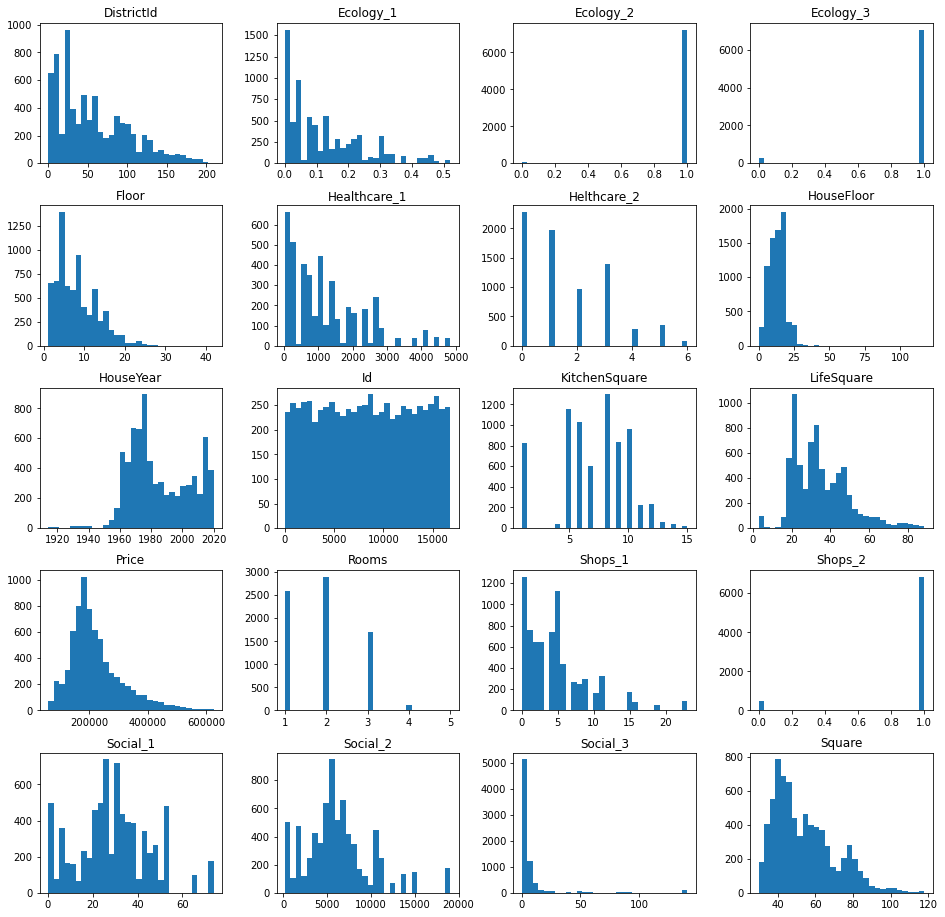

In [663]:
df.hist(figsize=(16,16), bins=30, grid=False);

По графикам выбрoсов не наблюдается. Начинаем обучение модели

#### Обучение и построение модели

Отбираем признаки

In [664]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']
target = ['Price']

In [665]:
X = df[feature_names]
y = df[target]

In [666]:
fill_life_square(test_df, square_coeff)

In [667]:
X_test = test_df[feature_names]

In [668]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Разбиваем датасет

In [669]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Масштабируем данные

In [670]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=feature_names)


Сравниваем модели и результаты

In [671]:
model_dict = {
   'lr': LinearRegression(),
   'knn': KNeighborsRegressor(),
   'dt': DecisionTreeRegressor(random_state=42),
   'rf': RandomForestRegressor(random_state=42),
    'gbr': GradientBoostingRegressor(),
    'lasso': Lasso() 
        
}

score_list = []

for model in model_dict:
    model_dict[model].fit(X_train_scaled, y_train)
    y_pred_train = model_dict[model].predict(X_train_scaled)
    y_pred_valid = model_dict[model].predict(X_valid_scaled)
    score_train = r2_score(y_train, y_pred_train)
    score_valid = r2_score(y_valid, y_pred_valid)
    score_list.append((score_train, score_valid))

for model, scores in zip(model_dict.keys(), score_list):
    print(f'{model}: \n\ttrain: {np.round(scores[0], 4)} \n\tvalid: {np.round(scores[1], 4)}')

<ipython-input-671-eedf2e1bc1e2>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_dict[model].fit(X_train_scaled, y_train)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


lr: 
	train: 0.5491 
	valid: 0.5431
knn: 
	train: 0.7421 
	valid: 0.6114
dt: 
	train: 1.0 
	valid: 0.3522
rf: 
	train: 0.9563 
	valid: 0.6932
gbr: 
	train: 0.7479 
	valid: 0.7038
lasso: 
	train: 0.5491 
	valid: 0.5431


Лучшие показатели на тренировочном сете дает GradientBoostingRegressor. r2 = 0.7038

In [672]:
gradient_boosting_regressor_model = GradientBoostingRegressor()
gradient_boosting_regressor_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

Оцениваем важность признаков

In [673]:
feature_importances = pd.DataFrame(zip(X_train.columns, gradient_boosting_regressor_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.564927
13,Social_3,0.114837
12,Social_2,0.072031
11,Social_1,0.061932
0,DistrictId,0.049341
8,Ecology_1,0.037510
7,HouseYear,0.036004
6,HouseFloor,0.017408
1,Rooms,0.014818
5,Floor,0.010071


Наибольшее влияние на стоимость оказывает параметр общей площади квартиры

#### Предсказываем результаты для тестового сета и загружаем их в файл

In [676]:
price = gradient_boosting_regressor_model.predict(X_test)

In [677]:
pd.DataFrame({ 'Id': test_df['Id'], 'Price': price }).to_csv('/Users/User/Desktop/pandas/course_project/ONPodosenova_prediction.csv', index=False)